## 实验：损失函数

### 实验概要

#### 训练数据 (集) 和测试数据 (集)

机器学习中，一般将数据分为 **训练数据** 和 **测试数据** 两部分来进行学习和测试等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的 **泛化能力**，就必须划分训练数据和测试数据。另外，训练数据也可以称为 **监督数据**。

![](./img/Sets-1_07.png)

某些情况下，在将模型通过测试数据进行评前，可以使用 **验证数据**（Validation Dataset）来看看模型在新数据（验证集和测试集是不同的数据）上的表现如何。同时通过调整超参数，让模型处于最好的状态。另外，验证集不像训练集和测试集，它是非必需的。如果不需要调整超参数，就可以不使用验证集，直接用测试集来评估效果。验证集评估出来的效果并非模型的最终效果，主要是用来调整超参数的，模型最终效果以测试集的评估结果为准。

**泛化能力** 是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的最终目标。比如，在识别手写数字的问题中，泛化能力可能会被用在自动读取明信片的邮政编码的系统上。此时，手写数字识别就必须具备较高的识别“某个人”写的字的能力。注意这里不是“特定的某个人写的特定的文字”，而是“任意一个人写的任意文字”。如果系统只能正确识别已有的训练数据，那有可能是只学习到了训练数据中的个人的习惯写法。

因此，仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。顺便说一下，只对某个数据集过度拟合的状态称为 **过拟合**（over ftting）。避免过拟合也是机器学习的一个重要课题。

#### 损失函数

机器学习中的监督学习本质上是给定一系列训练样本 $(x_i,y_i)$，尝试学习 $x \rightarrow y$ 的映射关系，使得给定一个 $x$，即便这个 $x$ 不在训练样本中，也能够输出 $\hat y$，尽量与真实的 $y$ 接近。损失函数是用来估量模型的输出 $\hat y$ 与真实值 $y$ 之间的差距，给模型的优化指引方向。

<img src="./img/LossSideBySide_07.png" width="60%">

- 蓝线表示预测。
- 红色箭头表示损失

从上图可以看到，左侧模型的损失较大；右侧模型的损失较小。因为，左侧曲线图中的红色箭头比右侧曲线图中的对应红色箭头长得多。显然，相较于左侧曲线图中的蓝线，右侧曲线图中的蓝线代表的是预测效果更好的模型。因此，我们创建了一个数学函数，以有意义的方式汇总各个损失，这就是 **损失函数**。如下图，模型通过不断调整与数据点之间的拟合度，从而获得最小的损失值。

![](./img/1_KQVi812_aERFRolz_5G3rA_07.gif)

模型的结构风险包括了经验风险和结构风险 —— 在监督式学习中，机器学习算法通过以下方式构建模型：检查多个样本并尝试找出可最大限度地减少损失的模型；这一过程称为 **经验风险最小化**。**损失函数** 是经验风险函数的核心部分：

$$\hat\theta = argmin_{\theta}\frac{1}{N}\sum_{i=1}^{N}L(y_i, f(x_i; \theta)+\lambda \Phi(\theta))$$

式中，前面的均值函数为经验风险，$L(y_i, f(x_i; \theta)$ 为损失函数，后面的项为结构风险，$\Phi(\theta)$ 衡量模型的复杂度。

从学习任务的类型出发，可以从广义上将损失函数分为两大类 —— 分类任务损失和回归问题。

- **分类任务** 我们要从类别值有限的数据集中预测输出，比如：给定一个手写数字图像的大数据集，将其分为 0～9 中的一个；区分『猫』和『狗』图片。
- **回归问题** 处理的则是连续值的预测问题，例如：给定房屋面积、房间数量以及房间大小，预测房屋价格。

### 实验目标

在本实验中，我们将分别从分类任务与回归问题出发，通过 Python 实现在分类与回归机器学习中的常用损失函数，包括：

回归任务损失函数：

- 均方误差
- 平均绝对误差
- 平方偏方误差

分类任务损失函数：

- Hinge loss
- 交叉熵损失

从而，使你初步了解如何对模型的经验风险作出可计量的评估。

### 1. 回归损失函数

这里主要介绍：

- **均方误差**
- **平均绝对误差**
- **平方偏方误差**

三个损失函数

#### 均方误差 (平方损失 / L2 损失)

均方误差 (**MSE**) 指的是每个样本的平均平方损失。要计算 **MSE**，请求出各个样本的所有平方损失之和，然后除以样本数量：

$$
\mathrm{MSE}=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

其中：

- **`N`：** 训练样本数
- **`i`：** 数据集中的训练样本索引号
- ${y}_{i}$：** 第 **i** 个训练样本的真实标签
- $\hat{y}_{i}$： 第 **i** 个训练示例的预测

虽然 **MSE** 常用于机器学习，但它既不是唯一实用的损失函数，也不是适用于所有情形的最佳损失函数。均方误差（**MSE**）度量的是预测值和实际观测值间差的平方的均值。它只考虑误差的平均大小，不考虑其方向（**正负无关**，由于经过平方，因此公式中的 ${y}_{i}$ 与 $\hat{y}_{i}$ 的顺序可以互换）。同样，由于经过平方，与真实值偏离较多的预测值会比偏离较少的预测值受到更为严重的惩罚。再加上 **MSE** 的数学特性很好，这使得计算梯度变得更容易。

作为第一个损失函数，我们稍微拆解一下演算步骤，**MSE** 公式可表达为 —— **MSE** 不考虑方向，预测值与真实值相减顺序可互换：

<img src="./img/MSE_07.png" width="60%">

使用 Numpy 拆解实现为，**注意运算符号与 Numpy 函数的颜色对应**：

<img src="./img/numpy-mean-square-error-formula_07.png" width="70%">

假设当前预测值和标签值都是 **3** 个，即：

<img src="./img/numpy-mse-1_07.png" width="60%">

预测值和标签值都包含三个值。 这意味着 n 的值为 3。进行减法后，最终得到的值如下所示：

<img src="./img/numpy-mse-2_07.png" width="60%">

然后我们可以对向量中的值求平方：

<img src="./img/numpy-mse-3_07.png" width="60%">

现在，我们对这些值求和：

<img src="./img/numpy-mse-4_07.png" width="25%">

运算结果就是我们的 **MSE** 值。

##### RMSE

**MSE** 执行了平方运算，其运算结果为原始数据集单位 (**量纲**) 的平方。为了与原始数据集单位 (**量纲**) 保持一致，通常我们使用 **RMSE** ，也就是对 **MSE** 的误差运算结果进行开方。**RMSE** (Root Mean Squared Error)，均方误差的平方根，即在 **MSE** 的基础上，取平方根。

$$
\mathrm{RMSE}=\sqrt{\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}}
$$

代码实现如下，我们使用 **`np.square()`** 函数计算真实值与预测值之间的误差值平方；之后，由于我们不想指定 n 的值，使用 **`mean()`** 方法，求出均方误差 **MSE**。这样做的好处是 numpy 不在乎预测和标签（真实值）是否包含一个或一千个值，只要它们的数量终是相同的并一一对应。

In [1]:
import numpy as np

# 设置预测值
y_hat = np.array([0.000, 0.166, 0.333])  
# 设置真实值
y_true = np.array([0.000, 0.254, 0.998]) 

# 设置rmse函数
def rmse(predictions, targets):
    # 求预测值-真实值的差
    differences = predictions - targets                      
    # 求（预测值-真实值）平方
    differences_squared = np.square(differences)             
    # 求出均方误差，即mse
    mean_of_differences_squared = differences_squared.mean() 
    # 取平方根得出rmse
    rmse_val = np.sqrt(mean_of_differences_squared) 
    # 返回值
    return rmse_val 

print("预测值: " + str(["%.8f" % elem for elem in y_hat]))
print("真实值：" + str(["%.8f" % elem for elem in y_true]))

rmse_val = rmse(y_hat, y_true)
print("RMSE 为: " + str(rmse_val))

预测值: ['0.00000000', '0.16600000', '0.33300000']
真实值：['0.00000000', '0.25400000', '0.99800000']
RMSE 为: 0.3872849941150143


#### 平均绝对误差 (L1 损失)

数学公式：

$$
\mathrm{MAE}=\frac{1}{N} \sum_{i=1}^{N}\left|y_{i}-\hat{y}_{i}\right|
$$

平均绝对误差（**MAE**）度量的是预测值和实际观测值之间绝对差之和的平均值。和 **MSE** 一样，这种度量方法也是在不考虑方向的情况下衡量误差大小。但和 **MSE** 的不同之处在于，**MAE** 需要像线性规划这样更复杂的工具来计算梯度。此外，**MAE** 对异常值更加稳健，因为它不使用平方。

In [2]:
import numpy as np

# 设置预测值
y_hat = np.array([0.000, 0.166, 0.333])  
# 设置真实值
y_true = np.array([0.000, 0.254, 0.998]) 

print("预测值: " + str(["%.8f" % elem for elem in y_hat]))
print("真实值：" + str(["%.8f" % elem for elem in y_true]))

# 设置mae函数
def mae(predictions, targets):
    # 求预测值-真实值的差  
    differences = predictions - targets                      
    # 求（预测值-真实值）绝对值
    absolute_differences = np.absolute(differences)          
    # 求均值得出 MAE
    mean_absolute_differences = absolute_differences.mean()  
    # 返回值
    return mean_absolute_differences 

mae_val = mae(y_hat, y_true)
print ("MAE 为: " + str(mae_val))

预测值: ['0.00000000', '0.16600000', '0.33300000']
真实值：['0.00000000', '0.25400000', '0.99800000']
MAE 为: 0.251


#### 平均偏差误差

平均偏差误差（**Mean Bias Error**）与其它损失函数相比，这个函数在机器学习领域没有那么常见。它与 **MAE** 相似，唯一的区别是这个函数没有用绝对值。用这个函数需要注意的一点是，正负误差可以互相抵消。尽管在实际应用中没那么准确，但它可以确定模型存在 **正偏差** 还是 **负偏差**。

$$MBE = \frac{\sum_{i=1}^{n}(y_i-\hat{y_i})}{n}$$

In [3]:
import numpy as np

# 设置预测值
y_hat = np.array([0.000, 0.166, 0.333])  
# 设置真实值
y_true = np.array([0.000, 0.254, 0.998]) 

print("预测值: " + str(["%.8f" % elem for elem in y_hat]))
print("真实值：" + str(["%.8f" % elem for elem in y_true]))

# 设置mbe函数
def mbe(predictions, targets):
    # 求预测值-真实值的差  
    differences = predictions - targets   
    # 求均值得出 MBE
    Mean_Bias_Error = differences.mean()  
    # 返回值
    return Mean_Bias_Error 

mbe_val = mbe(y_hat, y_true)
print ("MBE 为: " + str(mbe_val))

预测值: ['0.00000000', '0.16600000', '0.33300000']
真实值：['0.00000000', '0.25400000', '0.99800000']
MBE 为: -0.251


### 2. 分类损失函数

本部分主要介绍：

- **Hinge loss / 多分类 SVM 损失**
- **交叉熵损失 / 负对数似然**

#### Hinge Loss / 多分类 SVM 损失

简言之，在一定的安全间隔内（通常是 **1**），正确类别的分数应高于所有错误类别的分数之和。因此 **hinge loss** 常用于最大间隔分类（**maximum-margin classification**），最常用的是支持向量机。尽管不可微，但它是一个凸函数，因此可以轻而易举地使用机器学习领域中常用的凸优化器。

$$SVMLoss = \sum_{j \neq y_i}max(0, s_j-s_{y_{i}}+1)$$

思考下例，我们有三个训练样本，要预测三个类别（狗、猫和马）。以下是我们通过算法预测出来的每一类的值：

<img src="./img/1_07.png" width="50%">

运算过程如下：

##### image #1

- max(0, (1.49) - (-0.39) + 1) + max(0, (4.21) - (-0.39) + 1)
- max(0, 2.88) + max(0, 5.6)
- 2.88 + 5.6
- 8.48 (错误预测，高损失)

##### image #2

- max(0, (-4.61) - (3.28)+ 1) + max(0, (1.46) - (3.28)+ 1)
- max(0, -6.89) + max(0, -0.82)
- 0 + 0
- 0 (正确预测，零损失)

##### image #3

- max(0, (1.03) - (-2.27)+ 1) + max(0, (-2.37) - (-2.27)+ 1)
- max(0, 4.3) + max(0, 0.9)
- 4.3 + 0.9
- 5.2 (错误预测，高损失)

In [4]:
import numpy as np

# 对于二分类来说，hinge loss的函数表达式为max(0,1-y*y')
# y为预测值，y'为实际值
def hinge_loss_single(feature_vector, label, theta, theta_0):
    
    # 计算预测值
    ydash = label*(np.matmul(theta, feature_vector) + theta_0)
    
    # 根据公式定义损失
    hinge = np.max([0.0, 1 - ydash*label])
    return hinge

# 计算整体的hinge loss损失值
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    
    # 损失初始值
    tothinge = 0
    
    # 样本的数量
    num = len(feature_matrix)
    
    # 分别计算每个样本的损失值，并将其相加得到总的损失值
    for i in range(num):
        tothinge = tothinge + hinge_loss_single(feature_matrix[i], 
                                                labels[i], 
                                                theta, 
                                                theta_0)        
    hinge = tothinge   
    return hinge

feature_matrix = np.array([[2,2], [3,3], [7,0], [14,47]], dtype=object)
theta = np.array([0.002,0.6])
theta_0 = 0
labels = np.array([[1], [-1], [1], [-1]], dtype=object)
hingell = hinge_loss_full(feature_matrix, labels, theta, theta_0)

print('数据点: \n', feature_matrix)
print('\n\n对应标签: \n', labels)
print('\n\n 给定数据的 Hinge Loss：', hingell)

数据点: 
 [[2 2]
 [3 3]
 [7 0]
 [14 47]]


对应标签: 
 [[1]
 [-1]
 [1]
 [-1]]


 给定数据的 Hinge Loss： [0.986]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


#### 交叉熵损失 / 负对数似然

交叉熵误差（**Cross Entropy Error**）是分类问题中最常见的设置。随着预测概率偏离实际标签，交叉熵损失会逐渐增加。

首先，写出单个样本的交叉熵损失函数：

$$
\text { CrossEntropy Loss }=-\left(y_{i} \log \left(\hat{y}_{i}\right)+\left(1-y_{i}\right) \log \left(1-\hat{y}_{i}\right)\right)
$$

- 当实际标签为 **1 (y<sub>i</sub>=1)** 时，函数的后半部分消失，即：$\text { CrossEntropy Loss }=-\log \left(\hat{y}_{i}\right)$
- 当实际标签为 **0 (y<sub>i</sub>=0)** 时，函数的前半部分消失，即：$\text { CrossEntropy Loss }=-\log \left(1-\hat{y}_{i}\right)$

下面用 Python 代码实现以上公式：

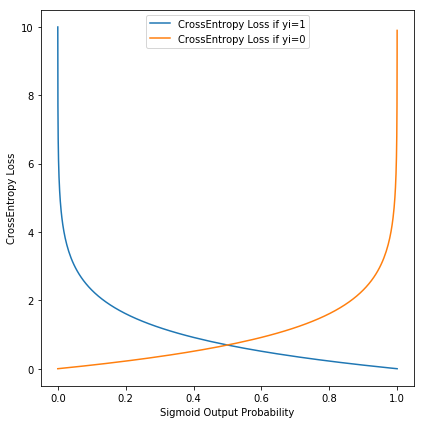

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 使用sigmoid函数进行分类
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 定义交叉熵损失函数
def cross_entropy_loss(yHat, yi):
    if yi == 1:
        return -np.log(yHat)
    
    else:
        return -np.log(1 - yHat)

# 计算Z的样本值
z = np.arange(-10, 10, 0.1)

# 计算sigmoid概率值
h_z = sigmoid(z)

# 计算实际值y = 1时损失函数的值
# -log(h(x))
cost_1 = cross_entropy_loss(h_z, 1)

# 计算实际值y = 0时损失函数的值
# -log(1 - h(x))
cost_0 = cross_entropy_loss(h_z, 0)

# 绘制交叉熵损失函数图
fig, ax = plt.subplots(figsize=(6,6))
# 绘制实际标签为 1的交叉熵损失函数曲线
plt.plot(h_z, cost_1, label='CrossEntropy Loss if yi=1') 
# 绘制实际标签为 0的交叉熵损失函数曲线
plt.plot(h_z, cost_0, label='CrossEntropy Loss if yi=0') 
# Sigmoid作为激活函数时的输出概率
plt.xlabel('Sigmoid Output Probability')                 
plt.ylabel('CrossEntropy Loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

看了 CrossEntropy Loss 的图形，简单明了。

- 先看蓝色，**Y<sub>i</sub> = 1**, 横坐标是预测输出，纵坐标是交叉熵损失函数 CrossEntropy Loss。显然，预测输出越接近真实样本标签 1，损失函数 CrossEntropy Loss 越小；预测输出越接近 0，CrossEntropy Loss 越大。因此，函数的变化趋势完全符合实际需要的情况。
- 在看橙色，**Y<sub>i</sub> = 0**, 同样，预测输出越接近真实样本标签 0，损失函数 CrossEntropy Loss 越小；预测函数越接近 1，CrossEntropy Loss 越大。函数的变化趋势也完全符合实际需要的情况。

从上图中，可以帮助我们对交叉熵损失函数有更直观的理解。无论真实样本标签 **Y<sub>i</sub>** 是 0 还是 1，CrossEntropy Loss 都表征了预测输出与 **Y<sub>i</sub>** 的差距。另外，重点提一点的是，从图形中我们可以发现：预测输出与 **Y<sub>i</sub>** 差得越多，L 的值越大，也就是说对当前模型的 **惩罚** 越大，而且是非线性增大，是一种类似指数增长的级别。这是由 **log** 函数本身的特性所决定的。这样的好处是模型会倾向于让预测输出更接近真实样本标签 **Y<sub>i</sub>**。

我们已经推导出了单个样本的损失函数，是如果是计算 N 个样本的总的损失函数，只要将 N 个 损失值叠加起来求平均就可以了。

$$
\text { Log loss }=\frac{1}{N} \sum_{i=1}^{N}-\left(y_{i} * \log \left(p_{i}\right)+\left(1-y_{i}\right) * \log \left(1-p_{i}\right)\right)
$$

另外，我们通常只考虑 **y<sub>i</sub>=1** 的情况，简言之，我们只是把真实值与预测概率的对数相乘。实现代码如下：

In [6]:
import numpy as np

# 设置预测值概率
predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
# 设置标签值/真实值
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])

# 定义交叉熵函数
"""
加上了一个微小值 epsilon。
这是因为，当出现 np.log(0)时， np.log(0)会变为负无限大的 -inf，
这样一来就会导致后续计算无法进行。
作为保护性对策，添加一个微小值可以防止负无限大的发生。
"""
# 添加微小值
def cross_entropy(predictions, targets, epsilon=1e-10): 
    
    # 指定输入 predictions 数组范围，应该在微小值和（1-微小值）之间，避免Log(0)出现
    predictions = np.clip(predictions, epsilon, 1 - epsilon) 
    
    # predictions 形状为（2,4），当前有两个样本，即 N = 2
    N = predictions.shape[0]   
    
    # 实现交叉熵损失公式
    ce_loss = -np.sum(np.sum(targets * np.log(predictions + 1e-5)))/N 
    return ce_loss

cross_entropy_loss = cross_entropy(predictions, targets)
print ("交叉熵损失为: " + str(cross_entropy_loss))

交叉熵损失为: 0.7135329699138555


### 实验小结

在本实验中，你通过 Python 实现在分类与回归机器学习中的常用损失函数，包括：均方误差、平均绝对误差、平方偏方误差；以及：Hinge loss Hinge Loss / 交叉熵损失。从而，使你初步了解如何对模型的经验风险作出可计量的评估。